# Régression Bayésienne avec les Relevance Vector Machines

In [1]:
# Import des packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter
from functools import partial
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [2]:
# Import du script RVM
%load_ext autoreload
%autoreload 2
import RVM

In [3]:
# Fonction pour afficher les sigma de la Grid Search des SVM
def clean_gridsearch_svmresult(result):
    for key_param in result['params'][0].keys():
        result[key_param] = result['params'].apply(lambda x: x[key_param])
    result["sigma"] = result["kernel"].apply(lambda x: str(x)[68:-1])
    result = result.drop(["params","kernel"], axis=1)
    return result

## Experience 1 : sinc sans bruit

In [4]:
# Fonction pour générer les données
def sinc(x):
    return np.sinc(x / np.pi)

In [5]:
# Simulation des données
x = np.linspace(-10, 10, 100)
X = np.expand_dims(x, axis=1)
y = sinc(x)

In [6]:
# Separation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [7]:
# Standardisation des données

mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)

X_stand = (X - mean_train) / std_train
X_train_stand = (X_train - mean_train) / std_train
X_test_stand = (X_test - mean_train) / std_train

#### Relevance Vector Machine

In [8]:
# Grid Search pour déterminer le paramètre du noyau à utiliser

start = perf_counter()

rvm = RVM.RVM(kernel=RVM.gaussian_kernel, iter_max=1000, selection="best_increase")

param_grid_search = {
    'kernel_param': [0.25, 0.5, 0.75, 1, 1.5, 2]
}

grid_search = GridSearchCV(rvm,
                           param_grid_search,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

iter: 0
nb support vector: 2
iter: 100
nb support vector: 24
iter: 200
nb support vector: 25
iter: 300
nb support vector: 22
iter: 400
nb support vector: 22
iter: 500
nb support vector: 22
iter: 600
nb support vector: 22
iter: 700
nb support vector: 22
iter: 800
nb support vector: 22
iter: 900
nb support vector: 22
iter: 0
nb support vector: 2
iter: 100
nb support vector: 30
iter: 200
nb support vector: 21
iter: 300
nb support vector: 21
iter: 400
nb support vector: 21
iter: 500
nb support vector: 21
iter: 600
nb support vector: 21
iter: 700
nb support vector: 21
iter: 800
nb support vector: 21
iter: 900
nb support vector: 21
iter: 0
nb support vector: 2
iter: 100
nb support vector: 27
iter: 200
nb support vector: 23
iter: 300
nb support vector: 23
iter: 400
nb support vector: 23
iter: 500
nb support vector: 23
iter: 600
nb support vector: 23
iter: 700
nb support vector: 23
iter: 800
nb support vector: 23
iter: 900
nb support vector: 23
iter: 0
nb support vector: 2
iter: 100
nb support

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 300
nb support vector: 4
iter: 400
nb support vector: 4
iter: 500
nb support vector: 4
iter: 600
nb support vector: 4
iter: 700
nb support vector: 4
iter: 800
nb support vector: 4
iter: 900
nb support vector: 4
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb support vector: 2
iter: 600
nb support vector: 2
iter: 700
nb support vector: 2
iter: 800
nb support vector: 2
iter: 900
nb support vector: 2
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb support vector: 2
iter: 600
nb support vector: 2
iter: 700
nb support vector: 2
iter: 800
nb support vector: 2
iter: 900
nb support vector: 2
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb s

In [9]:
# Temps d'exécution
print("Temps d'exécution: ", running_time)

Temps d'exécution:  66.2030357


In [10]:
# Résultat de la Grid Search
result = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)[['mean_test_score', 'mean_train_score', 'mean_fit_time', 'params']]
result

,mean_test_score,mean_train_score,mean_fit_time,params
1,-0.000025,-0.000013,2.422439,{'kernel_param': 0.5}
2,-0.069256,-0.069370,1.888440,{'kernel_param': 0.75}
3,-0.089339,-0.085697,1.862764,{'kernel_param': 1}
4,-0.096133,-0.092655,1.820574,{'kernel_param': 1.5}
5,-0.098420,-0.094989,1.759184,{'kernel_param': 2}
0,-2.409152,-1.506655,2.925897,{'kernel_param': 0.25}


In [11]:
# Apprentissage du RVM

start = perf_counter()

rvm = RVM.RVM(kernel=RVM.gaussian_kernel, kernel_param=0.5, 
              iter_max=1000, selection="best_increase")
rvm.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

iter: 0
nb support vector: 2
iter: 100
nb support vector: 7
iter: 200
nb support vector: 7
iter: 300
nb support vector: 7
iter: 400
nb support vector: 7
iter: 500
nb support vector: 7
iter: 600
nb support vector: 7
iter: 700
nb support vector: 7
iter: 800
nb support vector: 7
iter: 900
nb support vector: 7


In [12]:
# Informations
print("Temps d'exécution: ", running_time)
print("Nombre de vector support:", len(rvm.index))

Temps d'exécution:  2.5193034999999924
Nombre de vector support: 7


In [13]:
# Predictions sur les données de test
y_pred = rvm.predict(X_test_stand)
y_pred

array([ 1.09519390e-01, -1.97766419e-01,  3.52013572e-02, -2.07443813e-01,
        1.41518722e-01, -7.43008760e-02,  5.71347688e-02,  1.00413765e+00,
        6.86719739e-03,  3.39189445e-02, -1.43718637e-01, -1.48341781e-04,
       -1.45319188e-01,  3.95008211e-01, -1.68418965e-01,  6.55842908e-01,
       -1.17177586e-01,  3.07482474e-01,  7.34515354e-01, -1.69866262e-01,
        6.72271566e-02,  1.25519648e-01, -2.15664160e-02, -1.97124002e-01,
       -1.47599672e-01])

In [14]:
# RMSE de test
RMSE_rvm = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", RMSE_rvm)

RMSE : 0.006936764419533409


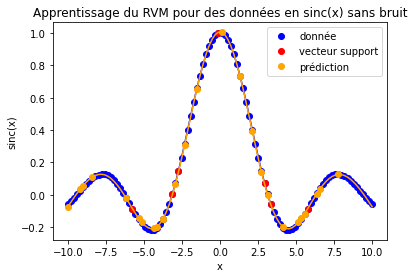

In [15]:
# Plot
plt.plot(X, y, color="blue")                        # Coube bleue : Fonction sinc sur l'ensemble des données
plt.plot(X, y, "o", color="blue", label="donnée")   # Point bleu : Données
plt.plot(X_train[[x - 1 for x in rvm.index]],       # Point rouge : Vecteur support
         y_train[[x - 1 for x in rvm.index]],
         "o", color="red", label="vecteur support")
plt.plot(X, rvm.predict(X_stand), color="orange")   # Courbe orange : Prédictions sur l'ensemble des données
plt.plot(X_test, y_pred, "o", color="orange", label="prédiction") # Point orange : Prédictions sur X_test
plt.title("Apprentissage du RVM pour des données en sinc(x) sans bruit")
plt.legend()
plt.xlabel("x")
plt.ylabel("sinc(x)")
plt.show()

**Prédictions probabilistes RVM**

In [16]:
# Paramètres et bornes intervalles de confiance pour la loi sur les prédictions
mu_star, sigma_star, L_95, H_95 = rvm.predict_proba(X_test_stand)

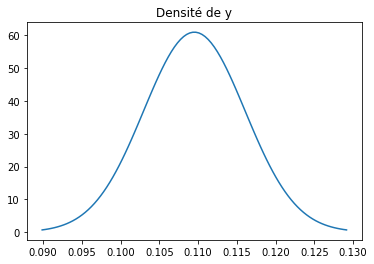

In [17]:
# Tracé loi sur les prédictions pour la variable x_num
num = 0
x_ = np.linspace(mu_star[num] - 3*sigma_star[num], mu_star[num] + 3*sigma_star[num], 100)
plt.plot(x_, stats.norm.pdf(x_, mu_star[num], sigma_star[num]))
plt.title("Densité de y")
plt.show()

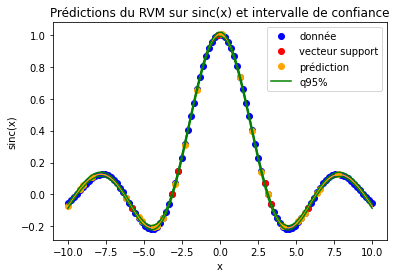

In [18]:
# Prédictions probabilistes pour l'ensemble des données
mu_star, sigma_star, L_95, H_95 = rvm.predict_proba(X_stand)

# Plot
plt.plot(X, sinc(X), color="blue")                 # Coube bleue : Fonction sinc sur l'ensemble des données
plt.plot(X, y, "o", color="blue", label="donnée")  # Point bleu : Données
plt.plot(X_train[[x - 1 for x in rvm.index]],      # Point rouge : Vecteur support
         y_train[[x - 1 for x in rvm.index]],
         "o", color="red",label="vecteur support")
plt.plot(X, rvm.predict(X_stand), color="orange")  # Courbe orange : Prédictions sur l'ensemble des données
plt.plot(X_test, y_pred, "o", color="orange", label="prédiction")   # Point orange : Prédictions sur X_test
plt.plot(X, L_95, color="green", label="q95%")
plt.plot(X, H_95, color="green")
plt.title("Prédictions du RVM sur sinc(x) et intervalle de confiance")
plt.xlabel("x")
plt.ylabel("sinc(x)")
plt.legend()
plt.show()

##### Support Vector Machine

In [19]:
# Grid Search pour déterminer les hyperparamètres

start = perf_counter()

svm = SVR()

param_grid_search = {
    'C': [0.001, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': [partial(RVM.gaussian_kernel, sigma = i) for i in [0.25, 0.5, 0.75, 1, 1.5, 2]]
}

grid_search = GridSearchCV(svm,
                           param_grid_search,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

In [20]:
# Temps d'exécution
print("Temps d'exécution:", running_time)

Temps d'exécution: 87.9087516


In [21]:
# Résultat de la Grid Search
result = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)[['mean_test_score', 'mean_train_score', 'mean_fit_time', 'params']]
result = clean_gridsearch_svmresult(result)
result

,mean_test_score,mean_train_score,mean_fit_time,C,epsilon,sigma
55,-0.000056,-0.000055,0.083488,10.000,0.01,sigma=0.5
73,-0.000056,-0.000055,0.086777,100.000,0.01,sigma=0.5
37,-0.000066,-0.000060,0.090447,1.000,0.01,sigma=0.5
74,-0.000071,-0.000061,0.104677,100.000,0.01,sigma=0.75
72,-0.000073,-0.000064,0.089327,100.000,0.01,sigma=0.25
...,...,...,...,...,...,...
7,-0.143876,-0.141445,0.086635,0.001,0.10,sigma=0.5
8,-0.145063,-0.142625,0.080132,0.001,0.10,sigma=0.75
9,-0.145965,-0.143634,0.088718,0.001,0.10,sigma=1
10,-0.146864,-0.144711,0.093077,0.001,0.10,sigma=1.5


In [22]:
# Apprentissage du SVM

start = perf_counter()

svm = SVR(kernel=partial(RVM.gaussian_kernel, sigma = 0.5), epsilon=0.01, C=10)
svm.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

In [23]:
# Informations
print("Temps d'exécution: ", running_time)
print("Number of vector support :", len(svm.support_))

Temps d'exécution:  0.14084660000000326
Number of vector support : 15


In [24]:
# Predictions sur les données de test
y_pred = svm.predict(X_test_stand)
y_pred

array([ 0.10891493, -0.19433997,  0.03247941, -0.20660896,  0.15486771,
       -0.05771789,  0.05797312,  0.98830356,  0.00308002,  0.03615119,
       -0.15047944,  0.01258945, -0.15135879,  0.40452937, -0.17433887,
        0.65434556, -0.12344175,  0.31634938,  0.73243742, -0.17524949,
        0.07873062,  0.12653124, -0.02800434, -0.19411551, -0.14042441])

In [25]:
# RMSE de test
RMSE_svm = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", RMSE_svm)

RMSE : 0.0070119127810757955


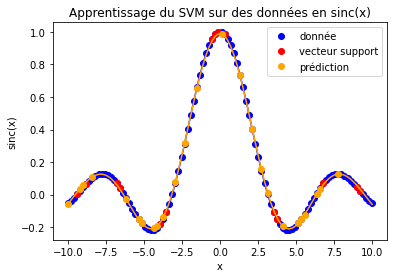

In [26]:
# Plot
plt.plot(X, y, color="blue")                       # Coube bleue : Fonction sinc sur l'ensemble des données
plt.plot(X, y, "o", color="blue", label="donnée")  # Point bleu : Données
plt.plot(X_train[svm.support_],                    # Point noir : Vecteur support
         y_train[svm.support_],
         "o", color="red", label="vecteur support")
plt.plot(X, svm.predict(X_stand), color="orange")  # Courbe orange : Prédictions sur l'ensemble des données
plt.plot(X_test, y_pred, "o", color="orange", label="prédiction")      # Point orange : Prédictions sur X_test
plt.title("Apprentissage du SVM sur des données en sinc(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("sinc(x)")
plt.show()

### Experience 2 : sinc avec bruit uniforme

In [27]:
# Fonction pour générer les données

def sinc(x):
    return np.sinc(x / np.pi)

def sinc_noise(x, low=-0.2, high=0.2):
    return np.sinc(x / np.pi) + np.random.uniform(low, high, x.shape[0])

In [28]:
# Simulation des données
x = np.linspace(-10, 10, 100)
X = np.expand_dims(x, axis=1)
y = sinc_noise(x)

In [29]:
# Separation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [30]:
# Standardisation des données

mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)

X_stand = (X - mean_train) / std_train
X_train_stand = (X_train - mean_train) / std_train
X_test_stand = (X_test - mean_train) / std_train

##### Relevance Vector Machine

In [31]:
# Grid Search pour déterminer le paramètre du noyau à utiliser

start = perf_counter()

rvm = RVM.RVM(kernel=RVM.gaussian_kernel, iter_max=1000, selection="best_increase")

param_grid_search = {
    'kernel_param': [0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3]
}

grid_search = GridSearchCV(rvm,
                           param_grid_search,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

iter: 0
nb support vector: 2


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 7
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 7
iter: 200
nb support vector: 7
iter: 300
nb support vector: 6
iter:

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 7
iter: 200
nb support vector: 7
iter: 300
nb support vector: 7


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 400
nb support vector: 7
iter: 500
nb support vector: 7
iter: 600
nb support vector: 7
iter: 700
nb support vector: 7
iter: 800
nb support vector: 7
iter: 900
nb support vector: 7
iter: 0
nb support vector: 2
iter: 100
nb support vector: 7
iter:

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter:

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 7
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter:

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 7
iter: 200
nb support vector: 7
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 5
iter: 200
nb support vector: 4
iter: 300
nb support vector: 4
iter: 400
nb support vector: 4


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 500
nb support vector: 4
iter: 600
nb support vector: 4
iter: 700
nb support vector: 4
iter: 800
nb support vector: 4
iter: 900
nb support vector: 4
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb support vector: 2
iter: 600
nb support vector: 2
iter: 700
nb support vector: 2
iter: 800
nb support vector: 2
iter: 900
nb support vector: 2
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb support vector: 2
iter: 600
nb support vector: 2
iter: 700
nb support vector: 2
iter: 800
nb support vector: 2
iter: 900
nb support vector: 2
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb support vector: 2
iter: 600
nb support vector: 2
iter: 700
nb s

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


 200
nb support vector: 4
iter: 300
nb support vector: 4
iter: 400
nb support vector: 4
iter: 500
nb support vector: 4
iter: 600
nb support vector: 4
iter: 700
nb support vector: 4
iter: 800
nb support vector: 4
iter: 900
nb support vector: 4
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb support vector: 2
iter: 600
nb support vector: 2
iter: 700
nb support vector: 2
iter: 800
nb support vector: 2
iter: 900
nb support vector: 2
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb support vector: 2
iter: 600
nb support vector: 2
iter: 700
nb support vector: 2
iter: 800
nb support vector: 2
iter: 900
nb support vector: 2
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb suppor

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb support vector: 2
iter: 600
nb support vector: 2
iter: 700
nb support vector: 2
iter: 800
nb support vector: 2
iter: 900
nb support vector: 2
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb support vector: 2
iter: 600
nb support vector: 2
iter: 700
nb support vector: 2
iter: 800
nb support vector: 2
iter: 900
nb support vector: 2
iter: 0
nb support vector: 2
iter: 100
nb support vector: 2
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb support vector: 2
iter: 500
nb support vector: 2
iter: 600
nb support vector: 2
iter: 700
nb support vector: 2
iter: 800
nb support vector: 2
iter: 900
nb support vector: 2
iter: 0
nb support vector: 2
iter: 100
nb support vector: 3
iter: 200
nb support vector: 2
iter: 300
nb support vector: 2
iter: 400
nb s

In [32]:
# Temps d'exécution
print("Temps d'exécution: ", running_time) # secondes PC Christos

Temps d'exécution:  77.42840380000001


In [33]:
# Résultat de la Grid Search
result = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)[['mean_test_score', 'mean_train_score', 'mean_fit_time', 'params']]
result

,mean_test_score,mean_train_score,mean_fit_time,params
0,-0.016238,-0.011662,2.112810,{'kernel_param': 0.25}
3,-0.098682,-0.093236,1.802906,{'kernel_param': 1}
4,-0.105100,-0.099496,1.782329,{'kernel_param': 1.5}
5,-0.107299,-0.101604,1.798878,{'kernel_param': 2}
6,-0.108301,-0.102565,1.775067,{'kernel_param': 2.5}
7,-0.119714,-0.106153,1.791285,{'kernel_param': 3}
2,-0.767625,-0.724719,1.826165,{'kernel_param': 0.75}
1,-6.996602,-7.059659,2.039217,{'kernel_param': 0.5}


In [34]:
# Apprentissage du RVM

start = perf_counter()

rvm = RVM.RVM(kernel=RVM.gaussian_kernel, kernel_param=0.25, 
              iter_max=1000, selection="best_increase")
rvm.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

iter: 0
nb support vector: 2
iter: 100
nb support vector: 10


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 200
nb support vector: 8
iter: 300
nb support vector: 8
iter: 400
nb support vector: 8
iter: 500
nb support vector: 8
iter: 600
nb support vector: 8
iter: 700
nb support vector: 8
iter: 800
nb support vector: 8
iter: 900
nb support vector: 8


In [35]:
# Informations
print("Temps d'exécution: ", running_time)
print("Nombre de vector support:", len(rvm.index))

Temps d'exécution:  2.725087700000003
Nombre de vector support: 8


In [36]:
# Predictions sur les données de test
y_pred = rvm.predict(X_test_stand)
y_pred

array([ 0.13186037, -0.2019652 ,  0.10542101, -0.22282125,  0.19523528,
       -0.07128607,  0.04619815,  0.95894089,  0.06289509,  0.01659009,
       -0.20332666,  0.0337948 , -0.14522264,  0.47349012, -0.22812755,
        0.60118487, -0.10926384,  0.34500741,  0.80818084, -0.17549949,
        0.13951095,  0.2464698 , -0.03985455, -0.19405968, -0.10792525])

In [37]:
# RMSE de test
RMSE_rvm = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", RMSE_rvm)

RMSE : 0.11749829901750235


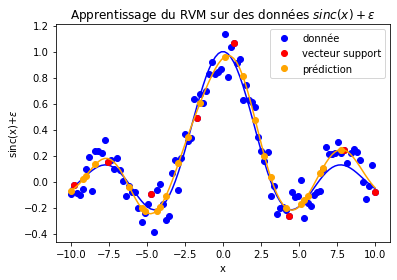

In [38]:
# Plot
plt.plot(X, sinc(X), color="blue")                 # Coube bleue : Fonction sinc sur l'ensemble des données
plt.plot(X, y, "o", color="blue", label="donnée")  # Point bleu : Données
plt.plot(X_train[[x - 1 for x in rvm.index]],      # Point rouge : Vecteur support
         y_train[[x - 1 for x in rvm.index]],
         "o", color="red", label="vecteur support")
plt.plot(X, rvm.predict(X_stand), color="orange")   # Courbe orange : Prédictions sur l'ensemble des données
plt.plot(X_test, y_pred, "o", color="orange", label="prédiction")  # Point orange : Prédictions sur X_test
plt.title("Apprentissage du RVM sur des données $sinc(x)+\epsilon$")
plt.xlabel("x")
plt.ylabel("sinc(x)+$\epsilon$")
plt.legend()
plt.show()

**Prédictions probabilistes RVM**

In [39]:
# Paramètres et bornes intervalles de confiance pour la loi sur les prédictions
mu_star, sigma_star, L_95, H_95 = rvm.predict_proba(X_test_stand)

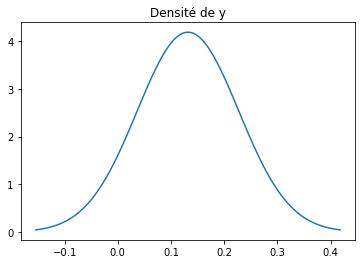

In [40]:
# Tracé loi sur les prédictions pour la variable x_num
num = 0
x_ = np.linspace(mu_star[num] - 3*sigma_star[num], mu_star[num] + 3*sigma_star[num], 100)
plt.plot(x_, stats.norm.pdf(x_, mu_star[num], sigma_star[num]))
plt.title("Densité de y")
plt.show()

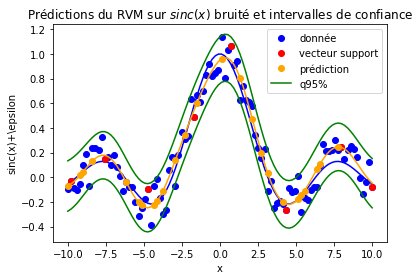

In [41]:
# Prédictions probabilistes pour l'ensemble des données
mu_star, sigma_star, L_95, H_95 = rvm.predict_proba(X_stand)

# Plot
plt.plot(X, sinc(X), color="blue")                 # Coube bleue : Fonction sinc sur l'ensemble des données
plt.plot(X, y, "o", color="blue", label="donnée")  # Point bleu : Données
plt.plot(X_train[[x - 1 for x in rvm.index]],      # Point rouge : Vecteur support
         y_train[[x - 1 for x in rvm.index]],
         "o", color="red", label="vecteur support")
plt.plot(X, rvm.predict(X_stand), color="orange")  # Courbe orange : Prédictions sur l'ensemble des données
plt.plot(X_test, y_pred, "o", color="orange", label="prédiction")  # Point orange : Prédictions sur X_test
plt.plot(X, L_95, color="green")
plt.plot(X, H_95, color="green", label="q95%")
plt.title("Prédictions du RVM sur $sinc(x)$ bruité et intervalles de confiance")
plt.xlabel("x")
plt.ylabel("sinc(x)+\epsilon")
plt.legend()
plt.show()

##### Support Vector Machine

In [42]:
# Grid Search pour déterminer les hyperparamètres

start = perf_counter()

svm = SVR()

param_grid_search = {
    'C': [0.001, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': [partial(RVM.gaussian_kernel, sigma = i) for i in [0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3]]

}

grid_search = GridSearchCV(svm,
                           param_grid_search,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

In [43]:
# Temps d'exécution
print("Temps d'exécution:", running_time)

Temps d'exécution: 119.54696560000002


In [44]:
# Résultat de la Grid Search
result = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)[['mean_test_score', 'mean_train_score', 'mean_fit_time', 'params']]
result = clean_gridsearch_svmresult(result)
result

,mean_test_score,mean_train_score,mean_fit_time,C,epsilon,sigma
105,-0.015995,-0.011292,0.096156,100.000,0.10,sigma=0.5
106,-0.016118,-0.012803,0.088873,100.000,0.10,sigma=0.75
81,-0.016149,-0.011679,0.090661,10.000,0.10,sigma=0.5
114,-0.016276,-0.014441,0.096669,100.000,0.20,sigma=0.75
89,-0.016512,-0.014103,0.090439,10.000,0.20,sigma=0.5
...,...,...,...,...,...,...
3,-0.144492,-0.142516,0.083272,0.001,0.01,sigma=1
4,-0.145431,-0.143583,0.086977,0.001,0.01,sigma=1.5
5,-0.145653,-0.143890,0.083177,0.001,0.01,sigma=2
6,-0.145735,-0.143967,0.087197,0.001,0.01,sigma=2.5


In [45]:
# Apprentissage du SVM

start = perf_counter()

svm = SVR(kernel = partial(RVM.gaussian_kernel, sigma = 0.5), epsilon=0.1, C=100)
svm.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

In [46]:
# Informations
print("Temps d'exécution: ", running_time)
print("Number of vector support :", len(svm.support_))

Temps d'exécution:  0.1644827999999734
Number of vector support : 28


In [47]:
# Predictions sur les données de test
y_pred = svm.predict(X_test_stand)
y_pred

array([ 1.58074315e-01, -1.90683697e-01,  1.03091852e-01, -2.54151854e-01,
        2.51972546e-01, -1.60099283e-01,  4.44744091e-02,  9.42243624e-01,
        6.13373307e-02, -3.69962576e-04, -2.33526024e-01,  8.72956036e-02,
       -1.55421899e-01,  5.09134357e-01, -2.59224481e-01,  6.45684634e-01,
       -1.17633324e-01,  3.61771181e-01,  7.91383855e-01, -1.86476157e-01,
        1.31097821e-01,  2.19321005e-01, -5.99123338e-02, -2.24621485e-01,
       -1.35147573e-01])

In [48]:
# RMSE de test
RMSE_svm = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", RMSE_svm)

RMSE : 0.12071576809223288


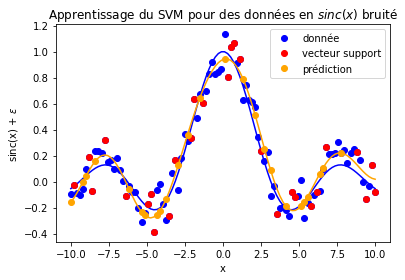

In [49]:
# Plot
plt.plot(X, sinc(X), color="blue")                 # Coube bleue : Fonction sinc sur l'ensemble des données
plt.plot(X, y, "o", color="blue", label="donnée")                  # Point bleu : Données
plt.plot(X_train[svm.support_],                    # Point noir : Vecteur support
         y_train[svm.support_],
         "o", color="red", label="vecteur support")
plt.plot(X, svm.predict(X_stand), color="orange")  # Courbe orange : Prédictions sur l'ensemble des données
plt.plot(X_test, y_pred, "o", color="orange", label="prédiction")      # Point orange : Prédictions sur X_test
plt.title("Apprentissage du SVM pour des données en $sinc(x)$ bruité")
plt.xlabel("x")
plt.ylabel("sinc(x) + $\epsilon$")
plt.legend()
plt.show()

#### Comparaison

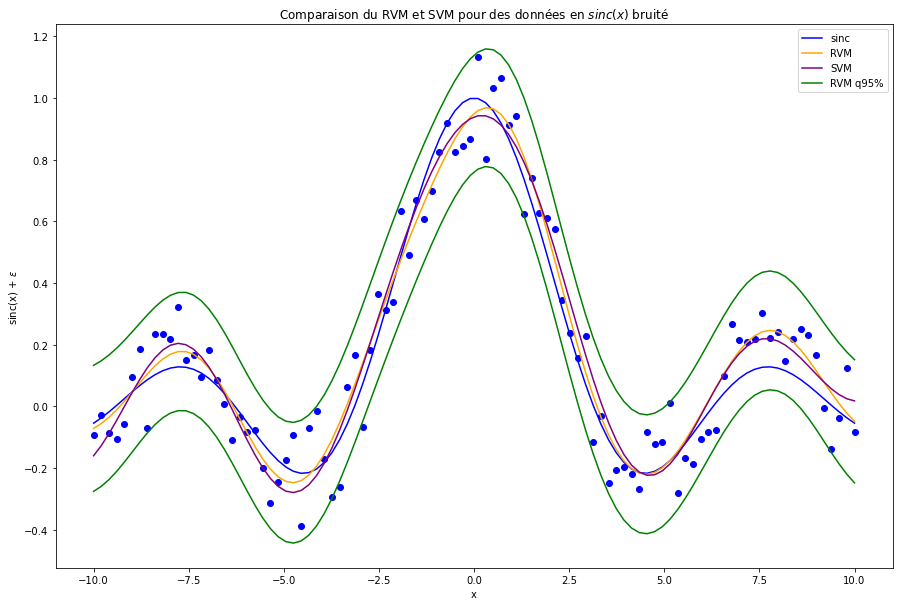

In [50]:
# Plot
plt.figure(figsize=(15,10))
plt.plot(X, sinc(X), color="blue", label="sinc")   # Coube bleue : Fonction sinc sur l'ensemble des données
plt.plot(X, y, "o", color="blue")                  # Point bleu : Données
plt.plot(X, rvm.predict(X_stand), color="orange", label="RVM")  # Courbe orange : Prédictions sur l'ensemble des données RVM
plt.plot(X, svm.predict(X_stand), color="purple", label="SVM")  # Courbe violet : Prédictions sur l'ensemble des données SVM
plt.plot(X, L_95, color="green")                   # Courbe verte : Intervale de confiance 95% RVM
plt.plot(X, H_95, color="green", label="RVM q95%")
plt.title("Comparaison du RVM et SVM pour des données en $sinc(x)$ bruité")
plt.xlabel("x")
plt.ylabel("sinc(x) + $\epsilon$")
plt.legend()
plt.show()

### Experience 3 : Friedman 2

In [51]:
# Simulation des données
from sklearn.datasets import make_friedman2
X, y = make_friedman2(n_samples=240, noise=0, random_state=123)

In [52]:
# Separation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [53]:
# Standardisation des données

mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)

X_stand = (X - mean_train) / std_train
X_train_stand = (X_train - mean_train) / std_train
X_test_stand = (X_test - mean_train) / std_train

##### Relevance Vector Machine

In [54]:
# Optionnel long : Grid Search pour déterminer le paramètre du noyau à utiliser

start = perf_counter()

rvm = RVM.RVM(kernel=RVM.gaussian_kernel, iter_max=1500, selection="best_increase")

param_grid_search = {
    'kernel_param': [0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3, 5]
}

grid_search = GridSearchCV(rvm,
                           param_grid_search,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

iter: 0
nb support vector: 2
iter: 100
nb support vector: 48
iter: 200
nb support vector: 63
iter: 300
nb support vector: 66
iter: 400
nb support vector: 70
iter: 500
nb support vector: 71
iter: 600
nb support vector: 72
iter: 700
nb support vector: 70
iter: 800
nb support vector: 70
iter: 900
nb support vector: 70
iter: 1000
nb support vector: 70
iter: 1100
nb support vector: 70
iter: 1200
nb support vector: 70
iter: 1300
nb support vector: 70
iter: 1400
nb support vector: 70
iter: 0
nb support vector: 2
iter: 100
nb support vector: 49
iter: 200
nb support vector: 60
iter: 300
nb support vector: 63
iter: 400
nb support vector: 66
iter: 500
nb support vector: 66
iter: 600
nb support vector: 66
iter: 700
nb support vector: 65
iter: 800
nb support vector: 65
iter: 900
nb support vector: 65
iter: 1000
nb support vector: 65
iter: 1100
nb support vector: 65
iter: 1200
nb support vector: 65
iter: 1300
nb support vector: 65
iter: 1400
nb support vector: 65
iter: 0
nb support vector: 2
iter: 1

iter: 0
nb support vector: 2
iter: 100
nb support vector: 25
iter: 200
nb support vector: 25
iter: 300
nb support vector: 24
iter: 400
nb support vector: 24
iter: 500
nb support vector: 24
iter: 600
nb support vector: 24
iter: 700
nb support vector: 24
iter: 800
nb support vector: 24
iter: 900
nb support vector: 24
iter: 1000
nb support vector: 24
iter: 1100
nb support vector: 24
iter: 1200
nb support vector: 24
iter: 1300
nb support vector: 24
iter: 1400
nb support vector: 24
iter: 0
nb support vector: 2
iter: 100
nb support vector: 28
iter: 200
nb support vector: 24
iter: 300
nb support vector: 24
iter: 400
nb support vector: 24
iter: 500
nb support vector: 24
iter: 600
nb support vector: 24
iter: 700
nb support vector: 24
iter: 800
nb support vector: 24
iter: 900
nb support vector: 24
iter: 1000
nb support vector: 24
iter: 1100
nb support vector: 24
iter: 1200
nb support vector: 24
iter: 1300
nb support vector: 24
iter: 1400
nb support vector: 24
iter: 0
nb support vector: 2
iter: 1

iter: 0
nb support vector: 2
iter: 100
nb support vector: 12
iter: 200
nb support vector: 12
iter: 300
nb support vector: 12
iter: 400
nb support vector: 12
iter: 500
nb support vector: 12
iter: 600
nb support vector: 12
iter: 700
nb support vector: 12
iter: 800
nb support vector: 12
iter: 900
nb support vector: 12
iter: 1000
nb support vector: 12
iter: 1100
nb support vector: 12
iter: 1200
nb support vector: 12
iter: 1300
nb support vector: 12
iter: 1400
nb support vector: 12
iter: 0
nb support vector: 2
iter: 100
nb support vector: 12
iter: 200
nb support vector: 12
iter: 300
nb support vector: 12
iter: 400
nb support vector: 12
iter: 500
nb support vector: 12
iter: 600
nb support vector: 12
iter: 700
nb support vector: 12
iter: 800
nb support vector: 12
iter: 900
nb support vector: 12
iter: 1000
nb support vector: 12
iter: 1100
nb support vector: 12
iter: 1200
nb support vector: 12
iter: 1300
nb support vector: 12
iter: 1400
nb support vector: 12
iter: 0
nb support vector: 2
iter: 1

In [55]:
# Optionnel long : Temps d'exécution
print("Temps d'exécution: ", running_time) # 1500 secondes PC Christos

Temps d'exécution:  611.3391720999999


In [56]:
# Optionnel long : Résultat de la Grid Search
result = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)[['mean_test_score', 'mean_train_score', 'mean_fit_time', 'params']]
result

,mean_test_score,mean_train_score,mean_fit_time,params
7,-9.914087e+01,-5.737753e+01,10.453430,{'kernel_param': 3}
6,-1.439103e+02,-8.476736e+01,10.517125,{'kernel_param': 2.5}
0,-6.838440e+03,-4.922318e+01,20.389230,{'kernel_param': 0.5}
5,-4.536434e+06,-7.548148e+06,11.506820,{'kernel_param': 2}
8,-7.025126e+06,-9.042707e+06,9.275901,{'kernel_param': 5}
1,-7.579531e+06,-7.635472e+06,16.654924,{'kernel_param': 0.75}
4,-8.769388e+06,-9.371859e+06,11.587067,{'kernel_param': 1.5}
2,-1.748239e+07,-2.008959e+07,14.821069,{'kernel_param': 1}
3,-5.603900e+07,-5.076696e+07,13.182812,{'kernel_param': 1.25}


In [57]:
# Apprentissage du RVM

start = perf_counter()

rvm = RVM.RVM(kernel=RVM.gaussian_kernel, kernel_param=3, 
              selection="best_increase", iter_max=1500)
rvm.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

iter: 0
nb support vector: 2
iter: 100
nb support vector: 14
iter: 200
nb support vector: 14
iter: 300
nb support vector: 14
iter: 400
nb support vector: 14
iter: 500
nb support vector: 14
iter: 600
nb support vector: 14
iter: 700
nb support vector: 14
iter: 800
nb support vector: 14
iter: 900
nb support vector: 14
iter: 1000
nb support vector: 14
iter: 1100
nb support vector: 14
iter: 1200
nb support vector: 14
iter: 1300
nb support vector: 14
iter: 1400
nb support vector: 14


In [58]:
# Informations
print("Temps d'exécution: ", running_time)
print("Nombre total d'itérations:", rvm.iter_total)
print("Nombre de vector support:", len(rvm.index))

Temps d'exécution:  15.267289399999981
Nombre total d'itérations: 1500
Nombre de vector support: 14


In [59]:
# Predictions sur les données de test
y_pred = rvm.predict(X_test_stand)
y_pred

array([ 233.88460924, 1560.47126922,  310.2405087 ,  107.68436364,
        941.40742005,  800.37861441,   83.86478835,  292.75055023,
       1133.4954914 ,  507.27188223,  369.37737234,  378.0503668 ,
        155.73032043,  703.68051034,  166.72717874,  585.73581438,
        212.2512162 ,  126.38330089,   86.1430086 , 1516.72906586,
       1229.97858524,  456.65090501,  183.39580968,  782.03527246,
        297.35317402,  263.39784263,  567.96231282,  884.1892126 ,
        444.33806765,  654.85619684,  397.34135504,  170.93876836,
        876.66744968, 1495.76119007,  132.46373299,  378.77800084,
       1111.44506923,  214.688979  , 1115.1129043 ,  766.45995323,
        896.94180362,  541.54372665,  149.77994294,  892.44832889,
        873.46269276,  853.04157388,  844.22656736,  824.53311836,
        779.46153691,  756.42405349,  115.7613546 ,  196.00702396,
        252.61134079, 1039.5665074 ,  277.50414206,  729.66361853,
       1230.52088659,  417.08311109,  533.53956136,  551.89306

In [60]:
# RMSE de test
RMSE_rvm = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", RMSE_rvm)

RMSE : 7.676706932578061


##### Support Vector Machine

In [61]:
# Optionnel long : Grid Search pour déterminer les hyperparamètres

start = perf_counter()

svm = SVR()

param_grid_search = {
    'C': [0.001, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': [partial(RVM.gaussian_kernel, sigma = i) for i in [0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3, 5]]
}

grid_search = GridSearchCV(svm,
                           param_grid_search,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

In [62]:
# Optionnel long : Temps d'exécution
print("Temps d'exécution:", running_time)

Temps d'exécution: 779.1401563


In [63]:
# Optionnel long : Résultat de la Grid Search
result = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)[['mean_test_score', 'mean_train_score', 'mean_fit_time', 'params']]
result = clean_gridsearch_svmresult(result)
result

,mean_test_score,mean_train_score,mean_fit_time,C,epsilon,sigma
111,-6346.724828,-5309.593380,0.519703,100.000,0.01,sigma=1.25
120,-6352.137438,-5316.404003,0.515050,100.000,0.10,sigma=1.25
129,-6363.118138,-5325.926836,0.515134,100.000,0.20,sigma=1.25
128,-6746.567998,-5336.944573,0.515382,100.000,0.20,sigma=1
119,-6746.786871,-5337.669540,0.516136,100.000,0.10,sigma=1
...,...,...,...,...,...,...
7,-169046.464507,-167755.008327,0.517968,0.001,0.01,sigma=3
25,-169046.464507,-167755.008327,0.508522,0.001,0.20,sigma=3
17,-169047.963983,-167756.507007,0.511356,0.001,0.10,sigma=5
8,-169047.963983,-167756.507007,0.514075,0.001,0.01,sigma=5


In [64]:
# Apprentissage du SVM

start = perf_counter()

svm = SVR(kernel=partial(RVM.gaussian_kernel, sigma = 1.25), epsilon=0.01, C=100)

svm.fit(X_train_stand, y_train)


end = perf_counter()
running_time = end-start

In [65]:
# Informations
print("Temps d'exécution: ", running_time)
print("Number of vector support :", len(svm.support_))

Temps d'exécution:  0.8085605000001124
Number of vector support : 180


In [66]:
# Predictions sur les données de test
y_pred = svm.predict(X_test_stand)
y_pred

array([ 222.75435473, 1269.37507707,  313.91924006,  121.3321566 ,
        923.06810271,  768.4681205 ,  109.89941624,  293.91852251,
       1077.04583299,  504.79729678,  389.30764569,  384.27146796,
        194.55020358,  746.19856215,  194.07646602,  611.26501728,
        194.17414321,  142.53410092,   62.30674575, 1336.66687583,
       1185.08165724,  444.66646138,  177.42031217,  740.14285011,
        314.00004519,  277.92137866,  539.9654858 ,  930.32968861,
        422.23045915,  664.58243189,  414.63152156,  207.04422241,
        863.9591169 , 1239.52325991,  210.46145494,  383.87521326,
       1083.37237977,  223.69044063, 1037.41092934,  759.50122444,
        810.53030031,  488.76908587,  184.87463669,  932.61824705,
        849.99981515,  818.69051434,  791.98340991,  846.13651017,
        714.00452949,  790.79234522,  100.0440055 ,  197.027353  ,
        247.93201155, 1045.56253661,  266.20840782,  685.30975343,
       1002.48034503,  420.53218503,  551.81145604,  569.93893

In [67]:
# RMSE de test
RMSE_svm = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", RMSE_svm)

RMSE : 73.77361607485996


### Diabete

In [68]:
from sklearn.datasets import load_diabetes

In [69]:
X, y = load_diabetes(return_X_y=True)

In [70]:
# Separation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [71]:
# Standardisation des données

mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)

X_stand = (X - mean_train) / std_train
X_train_stand = (X_train - mean_train) / std_train
X_test_stand = (X_test - mean_train) / std_train

##### RVM

In [72]:
# Optionnel long : Grid Search pour déterminer le paramètre du noyau à utiliser

start = perf_counter()

rvm = RVM.RVM(kernel=RVM.gaussian_kernel, iter_max=1500, selection="best_increase")

param_grid_search = {
    'kernel_param': [0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3, 5]
}

grid_search = GridSearchCV(rvm,
                           param_grid_search,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

iter: 0
nb support vector: 2
iter: 100
nb support vector: 40
iter: 200
nb support vector: 44
iter: 300
nb support vector: 48
iter: 400
nb support vector: 44
iter: 500
nb support vector: 43
iter: 600
nb support vector: 43
iter: 700
nb support vector: 43
iter: 800
nb support vector: 43
iter: 900
nb support vector: 43
iter: 1000
nb support vector: 43
iter: 1100
nb support vector: 43
iter: 1200
nb support vector: 43


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 1300
nb support vector: 43
iter: 1400
nb support vector: 43
iter: 0
nb support vector: 2
iter: 100
nb support vector: 37
iter: 200
nb support vector: 38
iter: 300
nb support vector: 38
iter: 400
nb support vector: 37
iter: 500
nb support vector: 37
iter: 600
nb support vector: 37
iter: 700
nb support vector: 37
iter: 800
nb support vector: 37
iter: 900
nb support vector: 37
iter: 1000
nb support vector: 37
iter: 1100
nb support vector: 37
iter: 1200
nb support vector: 37
iter: 1300
nb support vector: 37
iter: 1400
nb support vector: 37


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 0
nb support vector: 2
iter: 100
nb support vector: 44
iter: 200
nb support vector: 48
iter: 300
nb support vector: 50
iter: 400
nb support vector: 50
iter: 500
nb support vector: 49
iter: 600
nb support vector: 49
iter: 700
nb support vector: 47
iter: 800
nb support vector: 47
iter: 900
nb support vector: 45
iter: 1000
nb support vector: 45
iter: 1100
nb support vector: 45
iter: 1200
nb support vector: 45
iter: 1300
nb support vector: 45
iter: 1400
nb support vector: 45
iter: 0
nb support vector: 2
iter: 100
nb support vector: 39
iter: 200
nb support vector: 39
iter: 300
nb support vector: 40
iter: 400
nb support vector: 39
iter: 500
nb support vector: 39
iter: 600
nb support vector: 39
iter: 700
nb support vector: 39
iter: 800
nb support vector: 39
iter: 900
nb support vector: 39
iter: 1000
nb support vector: 39
iter: 1100
nb support vector: 39
iter: 1200
nb support vector: 39
iter: 1300
nb support vector: 39
iter: 1400
nb support vector: 39


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 0
nb support vector: 2
iter: 100
nb support vector: 37
iter: 200
nb support vector: 44
iter: 300
nb support vector: 41
iter: 400
nb support vector: 40
iter: 500
nb support vector: 40
iter: 600
nb support vector: 40
iter: 700
nb support vector: 40
iter: 800
nb support vector: 40
iter: 900
nb support vector: 40
iter: 1000
nb support vector: 40
iter: 1100
nb support vector: 40
iter: 1200
nb support vector: 40
iter: 1300
nb support vector: 40
iter: 1400
nb support vector: 40


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 0
nb support vector: 2
iter: 100
nb support vector: 16
iter: 200
nb support vector: 16
iter: 300
nb support vector: 16
iter: 400
nb support vector: 15
iter: 500
nb support vector: 15
iter: 600
nb support vector: 15
iter: 700
nb support vector: 15
iter: 800
nb support vector: 15
iter: 900
nb support vector: 15
iter: 1000
nb support vector: 15
iter: 1100
nb support vector: 15
iter: 1200
nb support vector: 15
iter: 1300
nb support vector: 15
iter: 1400
nb support vector: 15
iter: 0
nb support vector: 2
iter: 100
nb support vector: 15
iter: 200
nb support vector: 16
iter: 300
nb support vector: 16
iter: 400
nb support vector: 16
iter: 500
nb support vector: 16
iter: 600
nb support vector: 16
iter: 700
nb support vector: 16
iter: 800
nb support vector: 16
iter: 900
nb support vector: 16


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 1000
nb support vector: 16
iter: 1100
nb support vector: 16
iter: 1200
nb support vector: 16
iter: 1300
nb support vector: 16
iter: 1400
nb support vector: 16
iter: 0
nb support vector: 2
iter: 100
nb support vector: 14
iter: 200
nb support vector: 14
iter: 300
nb support vector: 14
iter: 400
nb support vector: 14
iter: 500
nb support vector: 14
iter: 600
nb support vector: 14
iter: 700
nb support vector: 14
iter: 800
nb support vector: 14
iter: 900
nb support vector: 14


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 1000
nb support vector: 14
iter: 1100
nb support vector: 14
iter: 1200
nb support vector: 14
iter: 1300
nb support vector: 14
iter: 1400
nb support vector: 14
iter: 0
nb support vector: 2
iter: 100
nb support vector: 17
iter: 200
nb support vector: 15
iter: 300
nb support vector: 15
iter: 400
nb support vector: 15
iter: 500
nb support vector: 15
iter: 600
nb support vector: 15
iter: 700
nb support vector: 15


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 800
nb support vector: 15
iter: 900
nb support vector: 15
iter: 1000
nb support vector: 15
iter: 1100
nb support vector: 15
iter: 1200
nb support vector: 15
iter: 1300
nb support vector: 15
iter: 1400
nb support vector: 15
iter: 0
nb support vector: 2
iter: 100
nb support vector: 18
iter: 200
nb support vector: 17
iter: 300
nb support vector: 17
iter: 400
nb support vector: 17
iter: 500
nb support vector: 17
iter: 600
nb support vector: 17


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 700
nb support vector: 17
iter: 800
nb support vector: 17
iter: 900
nb support vector: 17
iter: 1000
nb support vector: 17
iter: 1100
nb support vector: 17
iter: 1200
nb support vector: 17
iter: 1300
nb support vector: 17
iter: 1400
nb support vector: 17
iter: 0
nb support vector: 2
iter: 100
nb support vector: 10
iter: 200
nb support vector: 10
iter: 300
nb support vector: 10
iter: 400
nb support vector: 10
iter: 500
nb support vector: 10
iter: 600
nb support vector: 10
iter: 700
nb support vector: 10
iter: 800
nb support vector: 10
iter: 900
nb support vector: 10
iter: 1000
nb support vector: 10
iter: 1100
nb support vector: 10
iter: 1200
nb support vector: 10


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 1300
nb support vector: 10
iter: 1400
nb support vector: 10
iter: 0
nb support vector: 2
iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 10
iter: 200
nb support vector: 10
iter: 300
nb support vector: 10
iter: 400
nb support vector: 10
iter: 500
nb support vector: 10
iter: 600
nb support vector: 10
iter: 700
nb support vector: 10


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 800
nb support vector: 10
iter: 900
nb support vector: 10
iter: 1000
nb support vector: 10
iter: 1100
nb support vector: 10
iter: 1200
nb support vector: 10
iter: 1300
nb support vector: 10
iter: 1400
nb support vector: 10
iter: 0
nb support vector: 2
iter: 100
nb support vector: 9
iter: 200
nb support vector: 9
iter: 300
nb support vector: 9
iter: 400
nb support vector: 9
iter: 500
nb support vector: 9


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 600
nb support vector: 9
iter: 700
nb support vector: 9
iter: 800
nb support vector: 9
iter: 900
nb support vector: 9
iter: 1000
nb support vector: 9
iter: 1100
nb support vector: 9
iter: 1200
nb support vector: 9
iter: 1300
nb support vector: 9
iter: 1400
nb support vector: 9
iter: 0
nb support vector: 2
iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 7
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
it

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 8
iter: 200
nb support vector: 8
iter: 300
nb support vector: 8
iter: 400
nb support vector: 8
iter: 500
nb support vector: 8
it

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 0
nb support vector: 2
iter: 100
nb support vector: 5
iter: 200
nb support vector: 5
iter: 300
nb support vector: 5


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 400
nb support vector: 5
iter: 500
nb support vector: 5
iter: 600
nb support vector: 5
iter: 700
nb support vector: 5
iter: 800
nb support vector: 5
iter: 900
nb support vector: 5
iter: 1000
nb support vector: 5
iter: 1100
nb support vector: 5
iter: 1200
nb support vector: 5
iter: 1300
nb support vector: 5
iter: 1400
nb support vector: 5
iter: 0
nb support vector: 2
iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 5
iter: 200
nb support vector: 5
iter: 300
nb support vector: 5
iter: 400
nb support vector: 5
iter: 500
nb support vector: 5
iter: 600
nb support vector: 5
iter: 700
nb support vector: 5
iter: 800
nb support vector: 5
iter: 900
nb support vector: 5
iter: 1000
nb support vector: 5
iter: 1100
nb support vector: 5
iter: 1200
nb support vector: 5
iter: 1300
nb support vector: 5
iter: 1400
nb support vector: 5
iter: 0
nb support vector: 2
iter: 100
nb support vector: 5
iter: 200
nb support vector: 5
iter: 300
nb support vector: 5
iter: 400
nb support vector: 5
iter: 500
nb support vector: 5
iter: 600
nb support vector: 5
it

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 5


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 200
nb support vector: 5
iter: 300
nb support vector: 5
iter: 400
nb support vector: 5
iter: 500
nb support vector: 5
iter: 600
nb support vector: 5
iter: 700
nb support vector: 5
iter: 800
nb support vector: 5
iter: 900
nb support vector: 5
iter: 1000
nb support vector: 5
iter: 1100
nb support vector: 5
iter: 1200
nb support vector: 5
iter: 1300
nb support vector: 5
iter: 1400
nb support vector: 5
iter: 0
nb support vector: 2
iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 5
iter: 200
nb support vector: 5
iter: 300
nb support vector: 5
it

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 6
iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 5
iter: 200
nb support vector: 5
iter: 300
nb support vector: 5
iter: 400
nb support vector: 5
iter: 500
nb support vector: 5
iter: 600
nb support vector: 5
iter: 700
nb support vector: 5
iter: 800
nb support vector: 5
iter: 900
nb support vector: 5
iter: 1000
nb support vector: 5
iter: 1100
nb support vector: 5
iter: 1200
nb support vector: 5
iter: 1300
nb support vector: 5
iter: 1400
nb support vector: 5
iter: 0
nb support vector: 2
iter: 100
nb support vector: 5
iter: 200
nb support vector: 5
iter: 300
nb support vector: 5
iter: 400
nb support vector: 5
iter: 500
nb support vector: 5
iter: 600
nb support vector: 5
it

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6
iter: 0
nb support vector: 2
iter: 100
nb support vector: 7
iter: 200
nb support vector: 5
iter: 300
nb support vector: 5
iter: 400
nb support vector: 5
iter: 500
nb support vector: 5
iter: 600
nb support vector: 5
iter: 700
nb support vector: 5
iter: 800
nb support vector: 5
iter: 900
nb support vector: 5
iter: 1000
nb support vector: 5
iter: 1100
nb support vector: 5
iter: 1200
nb support vector: 5
iter: 1300
nb support vector: 5
iter: 1400
nb support vector: 5
iter: 0
nb support vector: 2
iter: 100
nb support vector: 5
iter: 200
nb support vector: 5
iter: 300
nb support vector: 5
iter: 400
nb support vector: 5
iter: 500
nb support vector: 5
it

C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6


In [73]:
# Optionnel long : Temps d'exécution
print("Temps d'exécution: ", running_time)

Temps d'exécution:  1258.0083739000002


In [74]:
# Optionnel long : Résultat de la Grid Search
result = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)[['mean_test_score', 'mean_train_score', 'mean_fit_time', 'params']]
result

,mean_test_score,mean_train_score,mean_fit_time,params
3,-2997.185245,-2764.258481,25.212684,{'kernel_param': 1.25}
4,-3006.682747,-2757.326303,25.156175,{'kernel_param': 1.5}
5,-3074.169579,-2802.360712,25.120742,{'kernel_param': 2}
6,-3074.806642,-2815.913256,24.932772,{'kernel_param': 2.5}
7,-3090.478136,-2832.484914,24.863798,{'kernel_param': 3}
2,-3092.205632,-2689.726724,25.798915,{'kernel_param': 1}
8,-3117.360655,-2842.620940,25.184522,{'kernel_param': 5}
1,-3124.048470,-2506.181681,28.667051,{'kernel_param': 0.75}
0,-3573.608122,-2001.123717,38.512769,{'kernel_param': 0.5}


In [75]:
# Apprentissage du RVM

start = perf_counter()

rvm = RVM.RVM(kernel=RVM.gaussian_kernel, kernel_param=1.25, 
              selection="best_increase", iter_max=1500)
rvm.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

iter: 0
nb support vector: 2
iter: 100
nb support vector: 6


C:\Users\Christos\Desktop\ENSAE 3A\Statistique Bayésienne\Projet\RVM.py:129: RuntimeWarning: divide by zero encountered in true_divide
  delta_l_alpha[to_reestimate] = Q[to_reestimate]**2/(S[to_reestimate] + (1/alpha_inv_diff_to_reestimate)) - np.log(1 + S[to_reestimate]*alpha_inv_diff_to_reestimate)


iter: 200
nb support vector: 6
iter: 300
nb support vector: 6
iter: 400
nb support vector: 6
iter: 500
nb support vector: 6
iter: 600
nb support vector: 6
iter: 700
nb support vector: 6
iter: 800
nb support vector: 6
iter: 900
nb support vector: 6
iter: 1000
nb support vector: 6
iter: 1100
nb support vector: 6
iter: 1200
nb support vector: 6
iter: 1300
nb support vector: 6
iter: 1400
nb support vector: 6


In [76]:
# Informations
print("Temps d'exécution: ", running_time)
print("Nombre total d'itérations:", rvm.iter_total)
print("Nombre de vector support:", len(rvm.index))

Temps d'exécution:  40.14662219999991
Nombre total d'itérations: 1500
Nombre de vector support: 6


In [77]:
# Predictions sur les données de test
y_pred = rvm.predict(X_test_stand)
y_pred

array([150.76472243, 146.88218731, 243.02377715, 149.55762136,
       156.39722917, 141.4558826 , 271.42945409, 109.21556585,
       118.62400269, 107.20722461, 108.43852092, 189.11407607,
       154.30275306, 214.18558543, 242.09251451, 170.51612807,
        95.29268449, 137.27498635, 172.02223908, 182.99614635,
       160.87661197, 258.9238371 , 144.45535541,  62.28225707,
       111.79857017, 186.97310686,  95.36232954, 102.07090198,
       151.74311969, 178.82608182,  85.29165553, 256.78880444,
       192.5597456 , 229.23752933, 193.51271458,  97.45469604,
        86.15721534, 111.27104763, 233.54354827,  92.72333183,
       199.11539647,  85.80762506, 114.86861335, 133.74623286,
        98.155452  , 233.37043724, 102.71843292,  72.24152196,
        78.64311285, 227.30859116,  96.09215475, 101.29321741,
       175.4925171 , 205.13331971, 130.8864908 , 208.22981012,
       225.85899915, 180.74891383, 197.07827346, 172.05676886,
       124.94954284, 113.19926916, 247.07313472, 211.51

In [78]:
# RMSE de test
RMSE_rvm = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", RMSE_rvm)

RMSE : 53.90659576066665


##### Support Vector Machine

In [79]:
# Optionnel long : Grid Search pour déterminer les hyperparamètres

start = perf_counter()

svm = SVR()

param_grid_search = {
    'C': [0.001, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': [partial(RVM.gaussian_kernel, sigma = i) for i in [0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3, 5]]
}

grid_search = GridSearchCV(svm,
                           param_grid_search,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(X_train_stand, y_train)

end = perf_counter()
running_time = end-start

In [80]:
# Optionnel long : Temps d'exécution
print("Temps d'exécution:", running_time)

Temps d'exécution: 2209.3039734999998


In [81]:
# Optionnel long : Résultat de la Grid Search
result = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)[['mean_test_score', 'mean_train_score', 'mean_fit_time', 'params']]
result = clean_gridsearch_svmresult(result)
result

,mean_test_score,mean_train_score,mean_fit_time,C,epsilon,sigma
113,-3045.716496,-2702.216110,0.978764,100.000,0.01,sigma=2
122,-3046.127633,-2702.117520,0.806827,100.000,0.10,sigma=2
131,-3046.807149,-2702.093323,0.818214,100.000,0.20,sigma=2
130,-3073.180100,-2577.872623,0.800255,100.000,0.20,sigma=1.5
121,-3073.800664,-2577.758794,0.837365,100.000,0.10,sigma=1.5
...,...,...,...,...,...,...
18,-6134.757467,-6079.721825,1.776737,0.001,0.20,sigma=0.5
25,-6134.810105,-6079.885226,1.779553,0.001,0.20,sigma=3
8,-6134.947449,-6081.267312,1.801718,0.001,0.01,sigma=5
17,-6135.023846,-6080.749504,1.784619,0.001,0.10,sigma=5


In [82]:
# Apprentissage du SVM

start = perf_counter()

svm = SVR(kernel=partial(RVM.gaussian_kernel, sigma = 2), epsilon=0.01, C=100)

svm.fit(X_train_stand, y_train)


end = perf_counter()
running_time = end-start

In [83]:
# Informations
print("Temps d'exécution: ", running_time)
print("Number of vector support :", len(svm.support_))

Temps d'exécution:  1.2933991999998398
Number of vector support : 331


In [84]:
# Predictions sur les données de test
y_pred = svm.predict(X_test_stand)
y_pred

array([151.34529185, 139.90319464, 234.59151061, 158.02777153,
       164.70310808, 147.58141129, 260.4375549 , 112.70136139,
       107.92175214, 112.84501702, 124.03290271, 181.32570742,
       155.67373068, 206.44968591, 239.72556795, 181.53628809,
       106.73430661, 147.27043955, 172.94762942, 192.45554631,
       167.1059343 , 242.81609114, 150.33074145,  62.30321977,
       114.62391057, 194.7709301 ,  89.83657748,  97.63632981,
       157.54139006, 179.75289556,  91.0181786 , 248.47066368,
       205.58629317, 220.62127424, 200.16575867,  91.74557662,
        82.65368614, 116.41828475, 232.07589778,  95.54789165,
       206.79008473,  82.15526182, 122.42594965, 129.17214083,
       102.48364718, 230.7375833 ,  99.84292588,  79.55791277,
        81.22102299, 226.49879795,  92.52502512, 101.13914163,
       174.55811343, 205.76698901, 141.44497966, 199.14052255,
       220.53205477, 182.85476611, 197.56391503, 176.04266604,
       127.18777421, 121.93332264, 237.11460118, 204.97

In [85]:
# RMSE de test
RMSE_svm = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", RMSE_svm)

RMSE : 52.884114546005456
